In [1]:
#!default_exp app

## Flowers Recognizer

In [3]:
!pip install -Uqq fastai gradio nbdev

^C


In [4]:
#!export
from fastai.vision.all import load_learner
import gradio as gr

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd /content/drive/My Drive/MasterCourse/Flowers Recognizer

/content/drive/My Drive/MasterCourse/Flowers Recognizer


In [8]:
#!export
model = load_learner(f'models/flowers_recognizer-v1.pkl')

In [12]:
#!export
flower_labels = (
    "aster",
    "daffodil",
    "dahlia",
    "daisy",
    "dandelion",
    "iris",
    "orchid",
    "rose",
    "sunflower",
    "tulip"
)

def recognize_image(image):
  pred, idx, probs = model.predict(image)
  print(pred)
  return dict(zip(flower_labels, map(float, probs)))

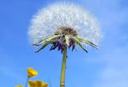

In [13]:
from PIL import Image
img = Image.open(f'test images/test01.jpg')
img.to_thumb(128,128)

In [14]:
recognize_image(img)

dandelion


{'aster': 4.247058313922025e-05,
 'daffodil': 0.0001085821058950387,
 'dahlia': 0.0004914170713163912,
 'daisy': 0.00012491790403146297,
 'dandelion': 0.9972763657569885,
 'iris': 1.1833933058369439e-05,
 'orchid': 5.458174928207882e-05,
 'rose': 4.161404831393156e-06,
 'sunflower': 0.0018543711630627513,
 'tulip': 3.1316649256041273e-05}

In [15]:
#!export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = [
    'test images/test01.jpg',
    'test images/test02.jpg',
    'test images/test03.jpg',
    'test images/test04.jpg'
    ]

iface = gr.Interface(fn=recognize_image, inputs=image, outputs=label, examples=examples)
iface.launch(inline=False, share=True)

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3cf43a0727a426bca3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
